In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from scipy import stats

In [3]:
train = pd.read_csv("train.csv")

In [4]:
lockdown_dates = pd.read_csv("lockdown_dates.csv")

In [5]:
train['Country_State'] = train['Country_Region'].str.cat(train.Province_State.fillna(''),sep=" ")

In [6]:
lockdown_dates['Country_State'] = lockdown_dates['Country_Region'].str.cat(lockdown_dates.Province_State.fillna(''),sep=" ")


In [7]:
train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities  \
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0   
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0   
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0   
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0   
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0   

  Country_State  
0  Afghanistan   
1  Afghanistan   
2  Afghanistan   
3  Afghanistan   
4  Afghanistan

In [8]:
train_use = train[train['Country_State'] == 'China Hubei']

In [9]:
st_dt = train_use['Date'][train_use['ConfirmedCases'] > 0].min()

In [10]:
train_use['Date_diff'] = (((pd.to_datetime(train_use['Date']) - pd.to_datetime(st_dt)).dt.days) + 1)

/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
train_use = train_use[train_use['Date_diff'] > 0]

In [12]:
ld_dt = lockdown_dates['Lockdown_date'][lockdown_dates['Country_State'] == 'China Hubei'][0]

In [150]:
ld_dt

'2020-01-23'

In [14]:
train_use['Date_diff_ld1'] = (((pd.to_datetime(train_use['Date']) - pd.to_datetime(ld_dt)).dt.days) - 14)

In [15]:
train_use['Date_diff_ld2'] = (((pd.to_datetime(train_use['Date']) - pd.to_datetime(ld_dt)).dt.days) - 28)

In [16]:
train_use['ConfirmedCases_inc'] = train_use['ConfirmedCases'] - train_use['ConfirmedCases'].shift(periods=1).fillna(0)

In [17]:
train_use.head()

Id Province_State Country_Region        Date  ConfirmedCases  \
4824  7170          Hubei          China  2020-01-22           444.0   
4825  7171          Hubei          China  2020-01-23           444.0   
4826  7172          Hubei          China  2020-01-24           549.0   
4827  7173          Hubei          China  2020-01-25           761.0   
4828  7174          Hubei          China  2020-01-26          1058.0   

      Fatalities Country_State  Date_diff  Date_diff_ld1  Date_diff_ld2  \
4824        17.0   China Hubei          1            -15            -29   
4825        17.0   China Hubei          2            -14            -28   
4826        24.0   China Hubei          3            -13            -27   
4827        40.0   China Hubei          4            -12            -26   
4828        52.0   China Hubei          5            -11            -25   

      ConfirmedCases_inc  
4824               444.0  
4825                 0.0  
4826               105.0  
4827               212.0  
4828               297.0

In [18]:
train_use['ConfirmedCases_inc_sm'] = train_use['ConfirmedCases_inc'].rolling(window=5,center=True,min_periods=1).mean()

In [19]:
train_use.head()

Id Province_State Country_Region        Date  ConfirmedCases  \
4824  7170          Hubei          China  2020-01-22           444.0   
4825  7171          Hubei          China  2020-01-23           444.0   
4826  7172          Hubei          China  2020-01-24           549.0   
4827  7173          Hubei          China  2020-01-25           761.0   
4828  7174          Hubei          China  2020-01-26          1058.0   

      Fatalities Country_State  Date_diff  Date_diff_ld1  Date_diff_ld2  \
4824        17.0   China Hubei          1            -15            -29   
4825        17.0   China Hubei          2            -14            -28   
4826        24.0   China Hubei          3            -13            -27   
4827        40.0   China Hubei          4            -12            -26   
4828        52.0   China Hubei          5            -11            -25   

      ConfirmedCases_inc  ConfirmedCases_inc_sm  
4824               444.0                 183.00  
4825                 0.0                 190.25  
4826               105.0                 211.60  
4827               212.0                 195.80  
4828               297.0                 622.00

In [20]:
# cap_upper = train_use['ConfirmedCases_inc'].mean() + 2*(train_use['ConfirmedCases_inc'].std())
# cap_lower = train_use['ConfirmedCases_inc'].mean() - 2*(train_use['ConfirmedCases_inc'].std())

In [21]:
# cap_upper, cap_lower

In [22]:
# train_use['ConfirmedCases_inc'] = train_use['ConfirmedCases_inc'].clip(lower=cap_lower, upper=cap_upper)

In [23]:
#train_use['ConfirmedCases_inc_zscore'] = stats.zscore(np.abs(train_use['ConfirmedCases_inc']))

In [24]:
#train_use[train_use['ConfirmedCases_inc_zscore'] > 2]

In [25]:
#train_use = train_use[train_use['ConfirmedCases_inc_zscore'] < 2]

In [26]:
train_use

Id Province_State Country_Region        Date  ConfirmedCases  \
4824  7170          Hubei          China  2020-01-22           444.0   
4825  7171          Hubei          China  2020-01-23           444.0   
4826  7172          Hubei          China  2020-01-24           549.0   
4827  7173          Hubei          China  2020-01-25           761.0   
4828  7174          Hubei          China  2020-01-26          1058.0   
4829  7175          Hubei          China  2020-01-27          1423.0   
4830  7176          Hubei          China  2020-01-28          3554.0   
4831  7177          Hubei          China  2020-01-29          3554.0   
4832  7178          Hubei          China  2020-01-30          4903.0   
4833  7179          Hubei          China  2020-01-31          5806.0   
4834  7180          Hubei          China  2020-02-01          7153.0   
4835  7181          Hubei          China  2020-02-02         11177.0   
4836  7182          Hubei          China  2020-02-03         13522.0   
4837  7183          Hubei          China  2020-02-04         16678.0   
4838  7184          Hubei          China  2020-02-05         19665.0   
4839  7185          Hubei          China  2020-02-06         22112.0   
4840  7186          Hubei          China  2020-02-07         24953.0   
4841  7187          Hubei          China  2020-02-08         27100.0   
4842  7188          Hubei          China  2020-02-09         29631.0   
4843  7189          Hubei          China  2020-02-10         31728.0   
4844  7190          Hubei          China  2020-02-11         33366.0   
4845  7191          Hubei          China  2020-02-12         33366.0   
4846  7192          Hubei          China  2020-02-13         48206.0   
4847  7193          Hubei          China  2020-02-14         54406.0   
4848  7194          Hubei          China  2020-02-15         56249.0   
4849  7195          Hubei          China  2020-02-16         58182.0   
4850  7196          Hubei          China  2020-02-17         59989.0   
4851  7197          Hubei          China  2020-02-18         61682.0   
4852  7198          Hubei          China  2020-02-19         62031.0   
4853  7199          Hubei          China  2020-02-20         62442.0   
...    ...            ...            ...         ...             ...   
4866  7212          Hubei          China  2020-03-04         67332.0   
4867  7213          Hubei          China  2020-03-05         67466.0   
4868  7214          Hubei          China  2020-03-06         67592.0   
4869  7215          Hubei          China  2020-03-07         67666.0   
4870  7216          Hubei          China  2020-03-08         67707.0   
4871  7217          Hubei          China  2020-03-09         67743.0   
4872  7218          Hubei          China  2020-03-10         67760.0   
4873  7219          Hubei          China  2020-03-11         67773.0   
4874  7220          Hubei          China  2020-03-12         67781.0   
4875  7221          Hubei          China  2020-03-13         67786.0   
4876  7222          Hubei          China  2020-03-14         67790.0   
4877  7223          Hubei          China  2020-03-15         67794.0   
4878  7224          Hubei          China  2020-03-16         67798.0   
4879  7225          Hubei          China  2020-03-17         67799.0   
4880  7226          Hubei          China  2020-03-18         67800.0   
4881  7227          Hubei          China  2020-03-19         67800.0   
4882  7228          Hubei          China  2020-03-20         67800.0   
4883  7229          Hubei          China  2020-03-21         67800.0   
4884  7230          Hubei          China  2020-03-22         67800.0   
4885  7231          Hubei          China  2020-03-23         67800.0   
4886  7232          Hubei          China  2020-03-24         67801.0   
4887  7233          Hubei          China  2020-03-25         67801.0   
4888  7234          Hubei          China  2020-03-26         67801.0   
4889  7235          Hubei          China  2020-0

In [27]:
train_use['Date_diff_p2'] = train_use['Date_diff']**2
train_use['Date_diff_p3'] = train_use['Date_diff']**3
# train_use['Date_diff_p4'] = train_use['Date_diff']**4

In [28]:
train_use['Date_diff_ld1_p2'] = train_use['Date_diff_ld1']**2
train_use['Date_diff_ld1_p3'] = train_use['Date_diff_ld1']**3

In [29]:
train_use['Date_diff_ld2_p2'] = train_use['Date_diff_ld2']**2
train_use['Date_diff_ld2_p3'] = train_use['Date_diff_ld2']**3

In [179]:
train_use_1 = train_use[train_use['Date_diff_ld1'] < 1]
train_use_2 = train_use[(train_use['Date_diff_ld1'] >= -1) & (train_use['Date_diff_ld2'] < 1)]
train_use_3 = train_use[train_use['Date_diff_ld2'] >= -1]

In [31]:
len(train_use_1)+len(train_use_2)+len(train_use_3)

76

In [32]:
input_columns = ['Date_diff','Date_diff_p2','Date_diff_p3']

In [33]:
reg_1 = LinearRegression().fit(train_use_1[input_columns], train_use_1['ConfirmedCases_inc_sm'])

In [34]:
reg_1.score(train_use_1[input_columns], train_use_1['ConfirmedCases_inc_sm'])

0.9771132422423866

In [35]:
reg_1.coef_, reg_1.intercept_

(array([-317.8705816 ,   67.42521802,   -2.40560633]), 555.726098901227)

In [36]:
train_use_1['ConfirmedCases_pred'] = reg_1.predict(train_use_1[input_columns])

/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
input_columns = ['Date_diff_ld1','Date_diff_ld1_p2','Date_diff_ld1_p3']

In [182]:
reg_2 = LinearRegression().fit(train_use_2[input_columns], train_use_2['ConfirmedCases_inc_sm'])

In [183]:
reg_2.score(train_use_2[input_columns], train_use_2['ConfirmedCases_inc_sm'])

0.595241310802514

In [184]:
reg_2.coef_, reg_2.intercept_

(array([64.30649843, 66.51585582, -6.10178812]), 2434.220433436517)

In [41]:
train_use_2['ConfirmedCases_pred'] = reg_2.predict(train_use_2[input_columns])

/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
input_columns = ['Date_diff_ld2','Date_diff_ld2_p2','Date_diff_ld2_p3']

In [43]:
reg_3 = LinearRegression().fit(train_use_3[input_columns], train_use_3['ConfirmedCases_inc_sm'])

In [44]:
reg_3.score(train_use_3[input_columns], train_use_3['ConfirmedCases_inc_sm'])

0.9376254294057428

In [170]:
reg_3.coef_, reg_3.intercept_

(array([-6.17016599e+01,  1.74202443e+00, -1.59441705e-02]), 705.0283558863738)

In [46]:
train_use_3['ConfirmedCases_pred'] = reg_3.predict(train_use_3[input_columns])

/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
train_use_f = train_use_1.append(train_use_2).append(train_use_3)

In [48]:
train_use_f

Id Province_State Country_Region        Date  ConfirmedCases  \
4824  7170          Hubei          China  2020-01-22           444.0   
4825  7171          Hubei          China  2020-01-23           444.0   
4826  7172          Hubei          China  2020-01-24           549.0   
4827  7173          Hubei          China  2020-01-25           761.0   
4828  7174          Hubei          China  2020-01-26          1058.0   
4829  7175          Hubei          China  2020-01-27          1423.0   
4830  7176          Hubei          China  2020-01-28          3554.0   
4831  7177          Hubei          China  2020-01-29          3554.0   
4832  7178          Hubei          China  2020-01-30          4903.0   
4833  7179          Hubei          China  2020-01-31          5806.0   
4834  7180          Hubei          China  2020-02-01          7153.0   
4835  7181          Hubei          China  2020-02-02         11177.0   
4836  7182          Hubei          China  2020-02-03         13522.0   
4837  7183          Hubei          China  2020-02-04         16678.0   
4838  7184          Hubei          China  2020-02-05         19665.0   
4839  7185          Hubei          China  2020-02-06         22112.0   
4838  7184          Hubei          China  2020-02-05         19665.0   
4839  7185          Hubei          China  2020-02-06         22112.0   
4840  7186          Hubei          China  2020-02-07         24953.0   
4841  7187          Hubei          China  2020-02-08         27100.0   
4842  7188          Hubei          China  2020-02-09         29631.0   
4843  7189          Hubei          China  2020-02-10         31728.0   
4844  7190          Hubei          China  2020-02-11         33366.0   
4845  7191          Hubei          China  2020-02-12         33366.0   
4846  7192          Hubei          China  2020-02-13         48206.0   
4847  7193          Hubei          China  2020-02-14         54406.0   
4848  7194          Hubei          China  2020-02-15         56249.0   
4849  7195          Hubei          China  2020-02-16         58182.0   
4850  7196          Hubei          China  2020-02-17         59989.0   
4851  7197          Hubei          China  2020-02-18         61682.0   
...    ...            ...            ...         ...             ...   
4866  7212          Hubei          China  2020-03-04         67332.0   
4867  7213          Hubei          China  2020-03-05         67466.0   
4868  7214          Hubei          China  2020-03-06         67592.0   
4869  7215          Hubei          China  2020-03-07         67666.0   
4870  7216          Hubei          China  2020-03-08         67707.0   
4871  7217          Hubei          China  2020-03-09         67743.0   
4872  7218          Hubei          China  2020-03-10         67760.0   
4873  7219          Hubei          China  2020-03-11         67773.0   
4874  7220          Hubei          China  2020-03-12         67781.0   
4875  7221          Hubei          China  2020-03-13         67786.0   
4876  7222          Hubei          China  2020-03-14         67790.0   
4877  7223          Hubei          China  2020-03-15         67794.0   
4878  7224          Hubei          China  2020-03-16         67798.0   
4879  7225          Hubei          China  2020-03-17         67799.0   
4880  7226          Hubei          China  2020-03-18         67800.0   
4881  7227          Hubei          China  2020-03-19         67800.0   
4882  7228          Hubei          China  2020-03-20         67800.0   
4883  7229          Hubei          China  2020-03-21         67800.0   
4884  7230          Hubei          China  2020-03-22         67800.0   
4885  7231          Hubei          China  2020-03-23         67800.0   
4886  7232          Hubei          China  2020-03-24         67801.0   
4887  7233          Hubei          China  2020-03-25         67801.0   
4888  7234          Hubei          China  2020-03-26         67801.0   
4889  7235          Hubei          China  2020-0

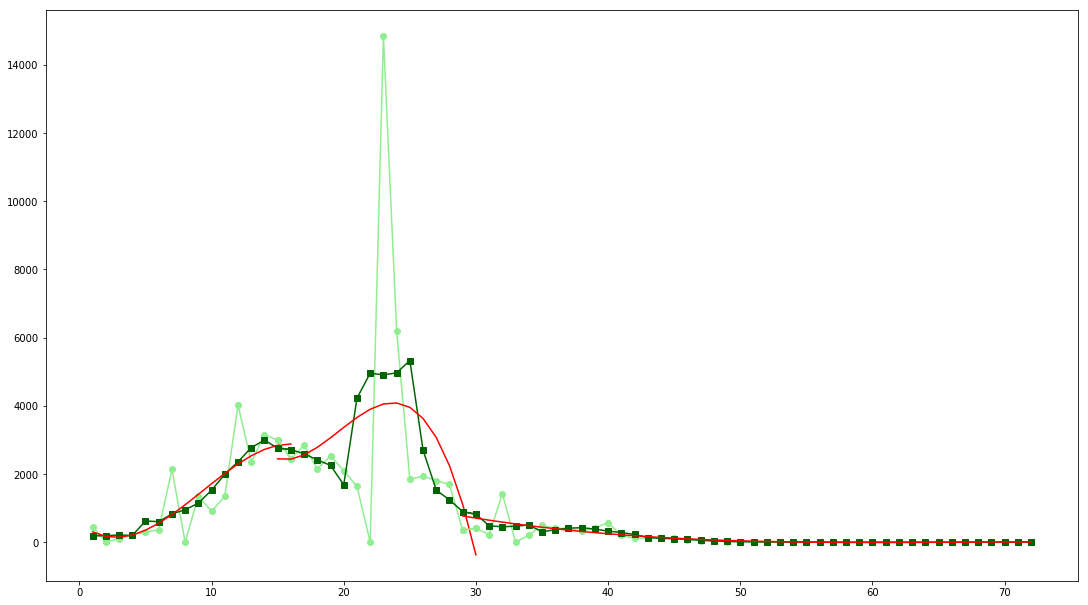

In [49]:
fig = plt.figure()
plt.ioff()
fig.set_size_inches(18.5, 10.5)
plt.plot(train_use_1['Date_diff'], train_use_1['ConfirmedCases_inc'], marker='o', color='lightgreen')
plt.plot(train_use_1['Date_diff'], train_use_1['ConfirmedCases_inc_sm'], marker='s', color='darkgreen')
plt.plot(train_use_1['Date_diff'], train_use_1['ConfirmedCases_pred'], color='r')
plt.plot(train_use_2['Date_diff'], train_use_2['ConfirmedCases_inc'], marker='o', color='lightgreen')
plt.plot(train_use_2['Date_diff'], train_use_2['ConfirmedCases_inc_sm'], marker='s', color='darkgreen')
plt.plot(train_use_2['Date_diff'], train_use_2['ConfirmedCases_pred'], color='r')
plt.plot(train_use_3['Date_diff'], train_use_3['ConfirmedCases_inc'], marker='o', color='lightgreen')
plt.plot(train_use_3['Date_diff'], train_use_3['ConfirmedCases_inc_sm'], marker='s', color='darkgreen')
plt.plot(train_use_3['Date_diff'], train_use_3['ConfirmedCases_pred'], color='r')
# fig.suptitle(Country_State, fontsize=20)
# fig.text(0.15, 0.93,'r square for confirmed cases: '+str(r_square_cc)+'%', fontsize=15)

### fatalities

In [51]:
!pip install plotly

    100% |████████████████████████████████| 7.2MB 2.3MB/s ta 0:00:011
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/z001t72/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [74]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [76]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=train_use['Date'], y=train_use['ConfirmedCases'],
                    mode='lines',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=train_use['Date'], y=train_use['Fatalities'],
                    mode='lines',
                    name='Fatalities'),
             secondary_y=True)
fig.show()

In [94]:
fig = px.scatter(x=train_use['ConfirmedCases'], y=train_use['Fatalities'], trendline="ols")
fig.show()

average days to death from the Virus is 18.5 days

https://www.telegraph.co.uk/news/2020/03/12/coronavirus-kills-average-185-days/

In [131]:
train_use['Fatalities_inc'] = train_use['Fatalities'] - train_use['Fatalities'].shift(periods=1).fillna(0)

In [142]:
train_use['ConfirmedCases_inc_lfd'] = train_use['ConfirmedCases'].shift(periods=10) - train_use['ConfirmedCases'].shift(periods=30)

In [143]:
train_use[['Date','Fatalities','ConfirmedCases','ConfirmedCases_lagn','ConfirmedCases_inc','ConfirmedCases_inc_lfd','Fatalities_inc']].head(40)

Date  Fatalities  ConfirmedCases  ConfirmedCases_lagn  \
4824  2020-01-22        17.0           444.0                  NaN   
4825  2020-01-23        17.0           444.0                  NaN   
4826  2020-01-24        24.0           549.0                  NaN   
4827  2020-01-25        40.0           761.0                  NaN   
4828  2020-01-26        52.0          1058.0                  NaN   
4829  2020-01-27        76.0          1423.0                444.0   
4830  2020-01-28       125.0          3554.0                444.0   
4831  2020-01-29       125.0          3554.0                549.0   
4832  2020-01-30       162.0          4903.0                761.0   
4833  2020-01-31       204.0          5806.0               1058.0   
4834  2020-02-01       249.0          7153.0               1423.0   
4835  2020-02-02       350.0         11177.0               3554.0   
4836  2020-02-03       414.0         13522.0               3554.0   
4837  2020-02-04       479.0         16678.0               4903.0   
4838  2020-02-05       549.0         19665.0               5806.0   
4839  2020-02-06       618.0         22112.0               7153.0   
4840  2020-02-07       699.0         24953.0              11177.0   
4841  2020-02-08       780.0         27100.0              13522.0   
4842  2020-02-09       871.0         29631.0              16678.0   
4843  2020-02-10       974.0         31728.0              19665.0   
4844  2020-02-11      1068.0         33366.0              22112.0   
4845  2020-02-12      1068.0         33366.0              24953.0   
4846  2020-02-13      1310.0         48206.0              27100.0   
4847  2020-02-14      1457.0         54406.0              29631.0   
4848  2020-02-15      1596.0         56249.0              31728.0   
4849  2020-02-16      1696.0         58182.0              33366.0   
4850  2020-02-17      1789.0         59989.0              33366.0   
4851  2020-02-18      1921.0         61682.0              48206.0   
4852  2020-02-19      2029.0         62031.0              54406.0   
4853  2020-02-20      2144.0         62442.0              56249.0   
4854  2020-02-21      2144.0         62662.0              58182.0   
4855  2020-02-22      2346.0         64084.0              59989.0   
4856  2020-02-23      2346.0         64084.0              61682.0   
4857  2020-02-24      2495.0         64287.0              62031.0   
4858  2020-02-25      2563.0         64786.0              62442.0   
4859  2020-02-26      2615.0         65187.0              62662.0   
4860  2020-02-27      2641.0         65596.0              64084.0   
4861  2020-02-28      2682.0         65914.0              64084.0   
4862  2020-02-29      2727.0         66337.0              64287.0   
4863  2020-03-01      2761.0         66907.0              64786.0   

      ConfirmedCases_inc  ConfirmedCases_inc_lfd  Fatalities_inc  
4824               444.0                     NaN            17.0  
4825                 0.0                     NaN             0.0  
4826               105.0                     NaN             7.0  
4827               212.0                     NaN            16.0  
4828               297.0                     NaN            12.0  
4829               365.0                     NaN            24.0  
4830              2131.0                     NaN            49.0  
4831                 0.0                     NaN             0.0  
4832              1349.0                     NaN            37.0  
4833               903.0                     NaN            42.0  
4834              1347.0                     NaN            45.0  
4835              4024.0                     NaN           101.0  
4836              2345.0                     NaN            64.0  
4837              3156.0                     NaN            65.0  
4838              2987.0                     NaN            70.0  
4839              2447.0                     NaN            69.0  
4840              2841.0                   

In [144]:
fig = px.scatter(x=train_use.dropna()['ConfirmedCases_inc_lfd'], y=train_use.dropna()['Fatalities_inc'], trendline="ols")
fig.show()

In [145]:
train_use['ConfirmedCases_lagn'] = train_use['ConfirmedCases'].shift(periods=5)

In [148]:
fig = px.scatter(x=train_use['ConfirmedCases'], y=train_use['Fatalities_inc'])
fig.show()